In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [28]:
df = pd.read_csv('final_internship_data.csv')
df.head(15)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,mMC7oPiW,Kayla Martin,Wendy Bennett,Excellent,sunny,Congested Traffic,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-1.291560,...,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,A2SNLxxM,James Burch,Casey Cannon,Excellent,windy,Flow Traffic,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-1.291195,...,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
7,tT6AJSJx,Alexander Ingram,Christy Hensley,Good,sunny,Congested Traffic,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-1.290694,...,1,2,2012,42.533214,36.829343,16.949505,20.548489,12.449213,4.155444,2.236596
8,D0Yb52vL,Anita Porter,Ana Norton,Excellent,rainy,Dense Traffic,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-1.291656,...,12,0,2012,42.240568,29.608237,23.942272,11.667601,3.637447,1.253232,-1.119470
9,GorULe8F,Monica Smith,Daniel Vargas,Very Good,sunny,Dense Traffic,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-1.291206,...,9,2,2009,42.218767,33.106804,20.538553,16.193381,8.129651,2.849627,0.327463


In [29]:
df

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


In [30]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [33]:
df.drop(columns=["User ID"	,"User Name","Driver Name",'key','year','hour','pickup_datetime','day','month','weekday'],inplace=True)

In [34]:
df = df.dropna(axis=1, how='all')

In [35]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [36]:
cat_features = ['Weather', 'Traffic Condition', 'Car Condition']
for col in cat_features:
  print(f'{col}: {df[col].unique()}')

Weather: ['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
Traffic Condition: ['Congested Traffic' 'Flow Traffic' 'Dense Traffic']
Car Condition: ['Very Good' 'Excellent' 'Bad' 'Good']


In [37]:
outlier_features =  df.drop(['Weather', 'Traffic Condition', 'Car Condition'],axis = 1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Car Condition      500000 non-null  object 
 1   Weather            500000 non-null  object 
 2   Traffic Condition  500000 non-null  object 
 3   fare_amount        500000 non-null  float64
 4   pickup_longitude   500000 non-null  float64
 5   pickup_latitude    500000 non-null  float64
 6   dropoff_longitude  499995 non-null  float64
 7   dropoff_latitude   499995 non-null  float64
 8   passenger_count    500000 non-null  int64  
 9   jfk_dist           499995 non-null  float64
 10  ewr_dist           499995 non-null  float64
 11  lga_dist           499995 non-null  float64
 12  sol_dist           499995 non-null  float64
 13  nyc_dist           499995 non-null  float64
 14  distance           499995 non-null  float64
 15  bearing            499995 non-null  float64
dtypes:

<Axes: xlabel='distance'>

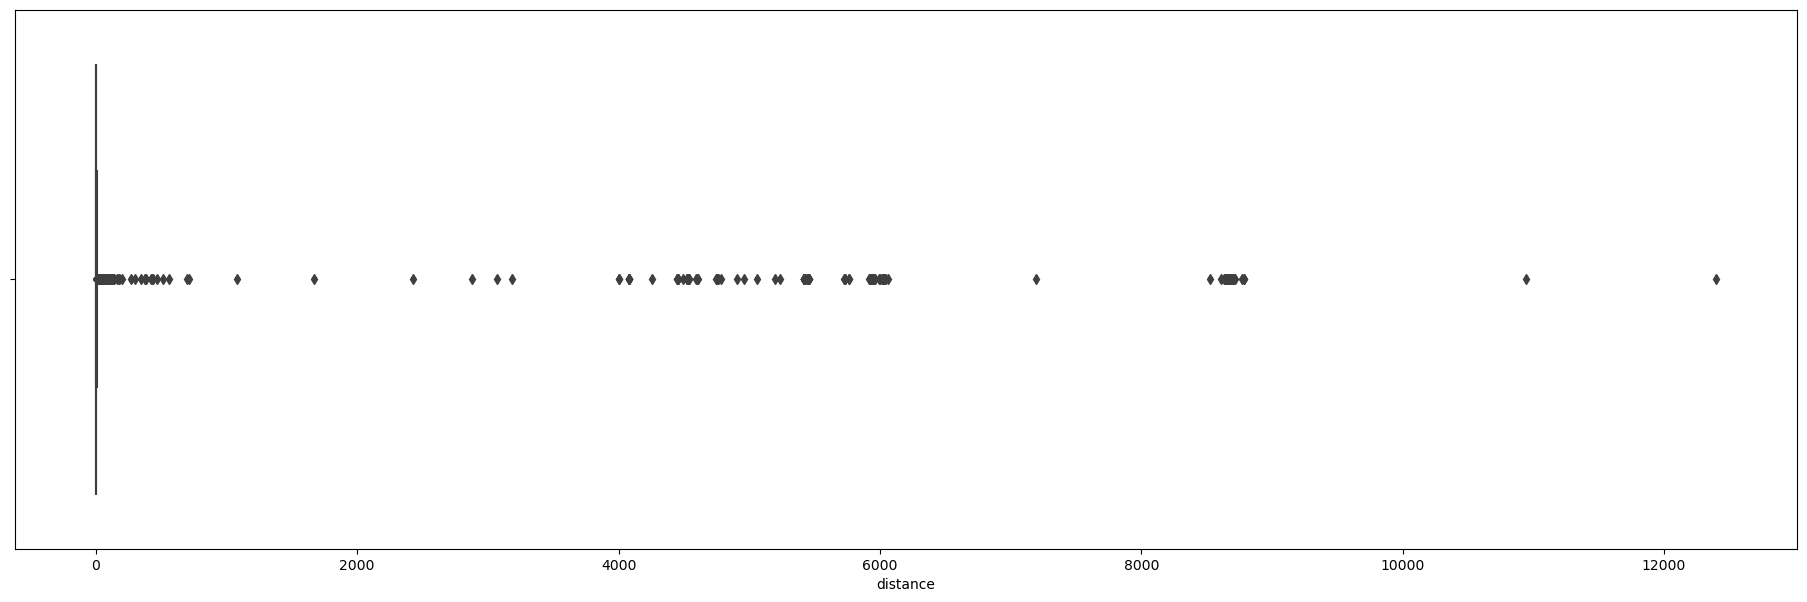

In [39]:
plt.figure(figsize=(23, 7))
sns.boxplot(x=df['distance'])

In [40]:
df.columns = df.columns.str.strip()

In [41]:
print(df.columns)

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'jfk_dist', 'ewr_dist',
       'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [42]:
df['fare_amount'].value_counts()

fare_amount
6.50     24101
4.50     20574
8.50     18730
5.30     14728
5.70     14493
         ...  
57.40        1
61.87        1
45.84        1
19.44        1
71.70        1
Name: count, Length: 1688, dtype: int64

In [43]:
df

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


In [44]:
print(df.isna().sum())

Car Condition        0
Weather              0
Traffic Condition    0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


### Encoding Categorical Features

In [45]:
onehot_encoder = OneHotEncoder()

ordinal_encoder = OrdinalEncoder(categories=[
    ['Congested Traffic', 'Dense Traffic', 'Flow Traffic'],
    ['Bad', 'Good', 'Very Good', 'Excellent']
])

weather_encoded = onehot_encoder.fit_transform(df[['Weather']])
ordinal_encoded = ordinal_encoder.fit_transform(df[['Traffic Condition', 'Car Condition']])

weather_encoded_df = pd.DataFrame(weather_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=['Traffic Condition Encoded', 'Car Condition Encoded'])
df_encoded = df.drop(['Weather', 'Traffic Condition', 'Car Condition'], axis=1)
df_encoded = pd.concat([df_encoded, weather_encoded_df, ordinal_encoded_df], axis=1)

print("NaN values in df_encoded:")
print(df_encoded.isna().sum())


NaN values in df_encoded:
fare_amount                  0
pickup_longitude             0
pickup_latitude              0
dropoff_longitude            5
dropoff_latitude             5
passenger_count              0
jfk_dist                     5
ewr_dist                     5
lga_dist                     5
sol_dist                     5
nyc_dist                     5
distance                     5
bearing                      5
Weather_cloudy               0
Weather_rainy                0
Weather_stormy               0
Weather_sunny                0
Weather_windy                0
Traffic Condition Encoded    0
Car Condition Encoded        0
dtype: int64


In [46]:
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'jfk_dist',
       'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing',
       'Weather_cloudy', 'Weather_rainy', 'Weather_stormy', 'Weather_sunny',
       'Weather_windy', 'Traffic Condition Encoded', 'Car Condition Encoded'],
      dtype='object')


In [47]:
df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].mean())


### Removing Outliers

In [48]:
from scipy import stats

numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_zscore = df_encoded[numeric_cols].apply(lambda x: stats.zscore(x, nan_policy='omit'))
threshold = 3
df_new = df_encoded[(df_zscore.abs() < threshold).all(axis=1)]
print(df_new)


        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               4.5         -1.288826         0.710721          -1.288779   
1              16.9         -1.291824         0.710546          -1.291182   
2               5.7         -1.291242         0.711418          -1.291391   
3               7.7         -1.291319         0.710927          -1.291396   
4               5.3         -1.290987         0.711536          -1.290787   
...             ...               ...              ...                ...   
499994         13.0         -1.291337         0.711193          -1.291321   
499995          7.0         -1.291173         0.711514          -1.290951   
499996         13.7         -1.291595         0.710670          -1.291708   
499997         25.0         -1.291262         0.710796          -1.289737   
499999          4.9         -1.291312         0.710736          -1.291243   

        dropoff_latitude  passenger_count   jfk_dist   ewr_dist   lga_dist 

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466767 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fare_amount                466767 non-null  float64
 1   pickup_longitude           466767 non-null  float64
 2   pickup_latitude            466767 non-null  float64
 3   dropoff_longitude          466767 non-null  float64
 4   dropoff_latitude           466767 non-null  float64
 5   passenger_count            466767 non-null  int64  
 6   jfk_dist                   466767 non-null  float64
 7   ewr_dist                   466767 non-null  float64
 8   lga_dist                   466767 non-null  float64
 9   sol_dist                   466767 non-null  float64
 10  nyc_dist                   466767 non-null  float64
 11  distance                   466767 non-null  float64
 12  bearing                    466767 non-null  float64
 13  Weather_cloudy             466767 

In [50]:
df_new.isna().sum()

fare_amount                  0
pickup_longitude             0
pickup_latitude              0
dropoff_longitude            0
dropoff_latitude             0
passenger_count              0
jfk_dist                     0
ewr_dist                     0
lga_dist                     0
sol_dist                     0
nyc_dist                     0
distance                     0
bearing                      0
Weather_cloudy               0
Weather_rainy                0
Weather_stormy               0
Weather_sunny                0
Weather_windy                0
Traffic Condition Encoded    0
Car Condition Encoded        0
dtype: int64

In [51]:
df_new['Car Condition Encoded'].value_counts()

Car Condition Encoded
0.0    116767
2.0    116739
1.0    116721
3.0    116540
Name: count, dtype: int64

### Scaling the data

In [52]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_new)
scaled_df = pd.DataFrame(scaled_data, columns=df_new.columns)

In [53]:
scaled_df.isna().sum()

fare_amount                  0
pickup_longitude             0
pickup_latitude              0
dropoff_longitude            0
dropoff_latitude             0
passenger_count              0
jfk_dist                     0
ewr_dist                     0
lga_dist                     0
sol_dist                     0
nyc_dist                     0
distance                     0
bearing                      0
Weather_cloudy               0
Weather_rainy                0
Weather_stormy               0
Weather_sunny                0
Weather_windy                0
Traffic Condition Encoded    0
Car Condition Encoded        0
dtype: int64

In [54]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466767 entries, 0 to 466766
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fare_amount                466767 non-null  float64
 1   pickup_longitude           466767 non-null  float64
 2   pickup_latitude            466767 non-null  float64
 3   dropoff_longitude          466767 non-null  float64
 4   dropoff_latitude           466767 non-null  float64
 5   passenger_count            466767 non-null  float64
 6   jfk_dist                   466767 non-null  float64
 7   ewr_dist                   466767 non-null  float64
 8   lga_dist                   466767 non-null  float64
 9   sol_dist                   466767 non-null  float64
 10  nyc_dist                   466767 non-null  float64
 11  distance                   466767 non-null  float64
 12  bearing                    466767 non-null  float64
 13  Weather_cloudy             46

### Feature Selection

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
X = scaled_df.drop(['fare_amount'],axis = 1)
y = scaled_df['fare_amount']
k = 16
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)
print("Scores:")
print(selector.scores_[selected_indices])

Selected Features:
Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'jfk_dist', 'ewr_dist',
       'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing',
       'Weather_rainy', 'Weather_sunny', 'Weather_windy',
       'Car Condition Encoded'],
      dtype='object')
Scores:
[ 43.62804718   9.08908685  41.88726574  10.93728529   2.1531712
  22.04895039  34.70337067  17.91566372  26.28200076  29.63995652
 287.2805678    2.55833877   0.99786456   1.07040946   1.07497161
   1.00410915]


In [56]:
print(scaled_df.columns)


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'jfk_dist',
       'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing',
       'Weather_cloudy', 'Weather_rainy', 'Weather_stormy', 'Weather_sunny',
       'Weather_windy', 'Traffic Condition Encoded', 'Car Condition Encoded'],
      dtype='object')


In [57]:
X = scaled_df[selected_features]
y = scaled_df['fare_amount']

In [58]:
y

0         0.381757
1         0.591216
2         0.402027
3         0.435811
4         0.395270
            ...   
466762    0.525338
466763    0.423986
466764    0.537162
466765    0.728041
466766    0.388514
Name: fare_amount, Length: 466767, dtype: float64

In [59]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,Weather_rainy,Weather_sunny,Weather_windy,Car Condition Encoded
0,0.487540,0.241609,0.601082,0.367449,0.2,0.007291,0.020220,0.005330,0.012838,0.010406,0.000956,0.035443,0.0,0.0,1.0,0.666667
1,0.475176,0.240876,0.594698,0.371597,0.2,0.016534,0.011433,0.008685,0.005509,0.003284,0.007840,0.440282,0.0,0.0,0.0,1.000000
2,0.477574,0.244532,0.594143,0.369726,0.4,0.016129,0.012140,0.007438,0.006489,0.003697,0.001289,0.913797,0.0,0.0,0.0,0.000000
3,0.477258,0.242474,0.594128,0.370174,0.2,0.015767,0.011705,0.007895,0.005740,0.002885,0.002597,0.521312,0.0,0.0,0.0,0.666667
4,0.478629,0.245025,0.595747,0.371701,0.2,0.016028,0.014284,0.005664,0.008757,0.005875,0.001855,0.419992,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466762,0.477183,0.243587,0.594329,0.369032,1.0,0.015571,0.011706,0.007797,0.005630,0.002727,0.000979,0.011838,0.0,0.0,1.0,0.666667
466763,0.477860,0.244931,0.595310,0.370201,0.2,0.015738,0.013220,0.006404,0.007500,0.004618,0.001303,0.137810,1.0,0.0,0.0,0.000000
466764,0.476121,0.241396,0.593299,0.367370,0.2,0.015454,0.009927,0.009957,0.003044,0.000346,0.000922,0.906948,1.0,0.0,0.0,0.666667
466765,0.477492,0.241923,0.598537,0.366777,0.2,0.011653,0.014116,0.007378,0.006996,0.004384,0.007291,0.193428,1.0,0.0,0.0,0.000000


In [60]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (466767, 16)
Shape of y: (466767,)


### Train Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [62]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  
    ('linear', LinearRegression()) 
])

In [63]:
param_grid = {
    'poly__degree': [2, 3, 4],              
    'linear__fit_intercept': [True, False] 
} 

In [69]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X, y)

In [41]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [65]:
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [66]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)


In [67]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.003110506313053501


In [68]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.03281487580573039
Mean Squared Error: 0.003110506313053501
R-squared: 0.7417187073599851


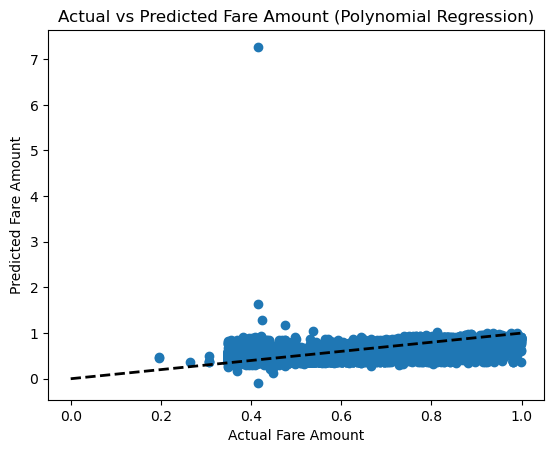

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount (Polynomial Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


In [44]:
# from keras_tuner import RandomSearch

# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(hp.Int('units_2', min_value=32, max_value=256, step=32), activation='relu'))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(1))

#     model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
#                   loss='mean_squared_error',
#                   metrics=['mae'])
#     return model

# tuner = RandomSearch(build_model,
#                      objective='val_mae',
#                      max_trials=5,
#                      executions_per_trial=3,
#                      directory='my_dir',
#                      project_name='helloworld')

# tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [45]:
# best_model = tuner.get_best_models(num_models=1)[0]
# best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


In [46]:
# model = keras.Sequential([
#     layers.Dense(160, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.3),  # Dropout layer with a rate of 30%
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(1)  # Output layer for regression
# ])
# model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

In [48]:
# y_pred = model.predict(X_test)

In [49]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R-squared:", r2_score(y_test, y_pred))


In [50]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel('Actual Fare Amount')
# plt.ylabel('Predicted Fare Amount')
# plt.title('Actual vs Predicted Fare Amount')
# plt.show()


In [54]:
import pickle

# Assuming 'model' is your trained model
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)
